In [284]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [285]:
import numpy as np
import pandas as pd

In [286]:
import datetime
from datetime import date, timedelta

In [287]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [288]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [289]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [290]:
Base.classes.keys()

['measurement', 'station']

In [291]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [292]:
session = Session(engine)

In [293]:
# Precipitation Analysis

# Design a query to retrieve the last 12 months of precipitation data and plot the results
start_date = datetime.datetime.strptime("2017-08-23", "%Y-%m-%d")
number_of_days = 365
dates = [start_date - datetime.timedelta(days=x) for x in range(0, number_of_days)]

# Convert to a list
string_dates = []
for date in dates:
    new_date = date.strftime("%Y-%m-%d")
    string_dates.append(new_date)

In [294]:
# Get the precipitation data
precipitation_results = session.query(func.avg(Measurement.prcp), Measurement.date)\
               .filter(Measurement.date.in_(string_dates))\
               .group_by(Measurement.date)

# Converting to a list
precipitation_data = []
for res in precipitation_results:
    precipitation_data.append(res[0])

In [295]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame([string_dates[::-1], precipitation_data[::-1]]).T
precipitation_df.rename(columns={0: "Date", 1: "Precipitation"}, inplace=True)
precipitation_df.set_index("Date", inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-24,0.1325
2016-08-25,0.166667
2016-08-26,0.193333
2016-08-27,0.005
2016-08-28,0.03


<IPython.core.display.Javascript object>


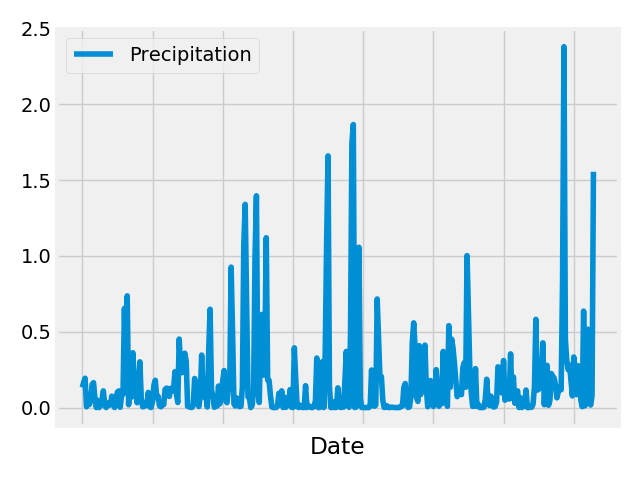

In [296]:
# Plot the data
precipitation_df.plot()
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Precipitation Analysis.png")
plt.show()

In [297]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

,Precipitation
count,365.0
unique,231.0
top,0.0
freq,48.0


In [298]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [299]:
# Station Analysis

# How many stations are available in this dataset?
stations = session.query(func.count(Station.station))
station_count = stations[0]
station_count

(9)

In [300]:
# What are the most active stations?
# List the stations and the counts in descending order.
obs_counts = session.query(Measurement.station, func.count(Measurement.prcp))\
             .group_by(Measurement.station)\
             .order_by(func.count(Measurement.prcp).desc())

# Printing observations
for station in obs_counts:
    print(station)
    
# Storing station name
top_station = obs_counts[0][0]

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [301]:
# Query to get last 12 months of tobs from top station
tobs_results = session.query(Measurement.tobs)\
               .filter(Measurement.date.in_(string_dates))\
               .filter(Measurement.station == top_station)
        
# Converting to a list
tobs_info = []
for row in tobs_results:
    tobs_info.append(row[0])

<IPython.core.display.Javascript object>


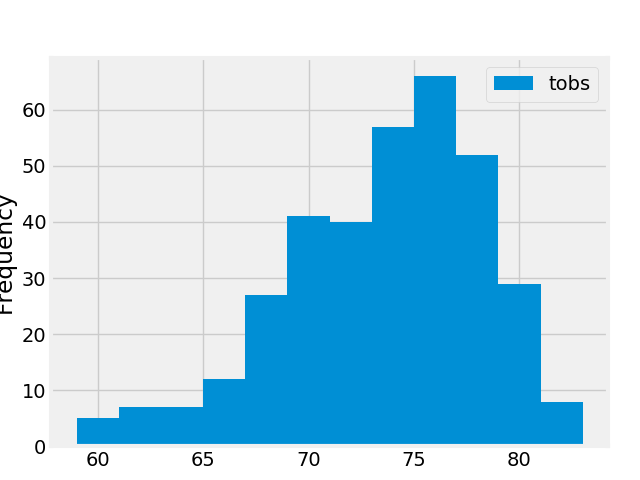

In [302]:
# Plot the histogram
plt.hist(tobs_info, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Station Analysis.png")
plt.show()